# Clustering with DBSCAN
## Clustering airlines based on average air time and average arrival delay using DBSCAN

In this notebook we will come back to our flights data and apply the DBSCAN clustering algorithm. 

At the end of this notebook you should: 
* know how to use the sklearn implementations of `DBSCAN`  
* know which steps are necessary to perform clustering with `DBSCAN`    

# Task
As K-Means has its Limitations, use DBSCAN for clustering the different airlines in our flight data based on their average Air Time and average Arrival Delay.

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## Steps to follow
**Hint:** You can use the k-means-in-python notebook as guide for this exercise.

In [2]:
# Import get_dataframe function from your own sql module
from sql_functions import get_dataframe
# Import get_engine
from sql_functions import get_engine
# create a variable called engine using the get_engine function
engine = get_engine()

In [3]:
# define/assign the schema you want to query from
schema = 'hh_analytics_24_1'

In [4]:
# Get the aggregated data from the database
     # airline, avg(air_time), avg(arr_delay
# Hint: As in Notebook 2, use sql a select statement within pd.read_sql_query().
sql_select = f'''select
                    airline,
                    avg(air_time) as avg_air_time,
                    avg(arr_delay) as avg_arr_delay
               from {schema}.flights
               group by 1
               '''

In [5]:
# Query the database
dbscan_data = pd.read_sql_query(sql_select, engine)

In [6]:
# check results
dbscan_data.head()

,airline,avg_air_time,avg_arr_delay
0,9E,61.791292,-7.666273
1,AA,140.025458,-6.076874
2,AS,175.043396,-8.930206
3,B6,167.544466,4.639062
4,DL,135.102183,-4.898960


In [7]:
# Set up the scaler object to standardize the data using StandardScaler()
sc = StandardScaler()
scaled_data = sc.fit_transform(dbscan_data[['avg_air_time', 'avg_arr_delay']])

In [8]:
# Result is a transformed array with transformed values
scaled_data

array([[-1.5527464 , -0.85398448],
       [ 0.69995618, -0.39410511],
       [ 1.70827522, -1.2196933 ],
       [ 1.49234835,  2.70646343],
       [ 0.55819364, -0.05328537],
       [ 0.37523007, -0.94321833],
       [ 0.22571071,  1.41120815],
       [ 0.74382687, -0.55955803],
       [-1.03784605,  1.10975542],
       [ 0.67343831,  0.12990026],
       [-1.3985775 ,  0.76387432],
       [-0.967938  ,  0.32292071],
       [-1.03177606, -0.16848109],
       [ 1.14846457, -0.6402114 ],
       [-0.25887898, -0.68514903],
       [-0.49647275,  0.18201104],
       [-0.88120818, -1.10844719]])

In [56]:
# Set up the DBSCAN object and cluster using the scaled data
# Hint: dbscan=DBSCAN(), dbscan.fit(yourdata)

dbscan = DBSCAN(eps = 0.85, min_samples=3)
dbscan.fit(X = scaled_data)

DBSCAN(eps=0.85, min_samples=3)

In [57]:
# Write the clusters (.labels_) to the dataframe as a new column 
dbscan_data['db_clusters'] = dbscan.labels_

In [58]:
dbscan_data #.sample(10)

,airline,avg_air_time,avg_arr_delay,db_clusters
0,9E,61.791292,-7.666273,0
1,AA,140.025458,-6.076874,0
2,AS,175.043396,-8.930206,0
3,B6,167.544466,4.639062,-1
4,DL,135.102183,-4.898960,0
5,F9,128.748037,-7.974675,0
6,G4,123.555375,0.162505,-1
7,HA,141.549044,-6.648699,0
8,MQ,79.673279,-0.879352,1
9,NK,139.104518,-4.265849,0


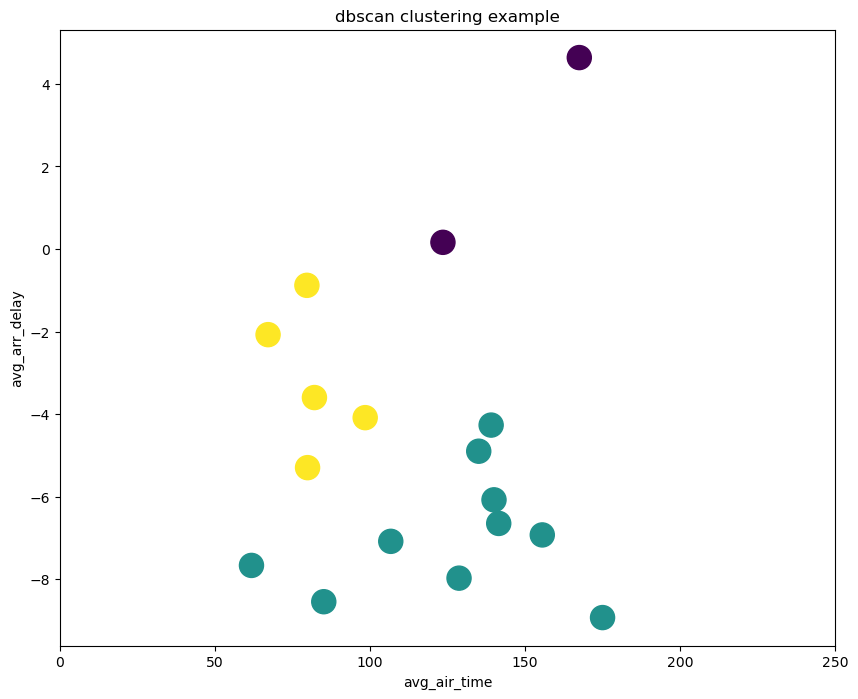

In [59]:
# Set up scatterplot with color of points based on cluster labels
fig, ax1 = plt.subplots(figsize=(10,8))

#labels
ax1.set_xlabel('avg_air_time')
ax1.set_ylabel('avg_arr_delay')
ax1.set_title('dbscan clustering example')
ax1.set_xlim(0,250)
#plot
plt.scatter(dbscan_data['avg_air_time'], 
            dbscan_data['avg_arr_delay'], 
            s = 300, 
            c = dbscan_data['db_clusters'] # color based on cluster labels 
           ); 